In [3]:
# write your code here
import numpy as np
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt


class Recommendation:
    def __init__(self,user_number, item_number, k):
        self.P = np.random.rand(user_number,k)
        self.Q = np.random.rand(k, item_number)
        self.loss_in_train = []
    
    #use ALS to train the matrix P and Q
    def train(self, R_train, R_test, beta=0.1 ,k=100,epoch=2):
        for e in range(epoch):
            for u in range(R_train.shape[0]):
                for i in range(R_train.shape[1]):
                    if R_train[u][i] > 0:
                        error = R_train[u][i] - np.dot(self.P[u,:], self.Q[:,i])
                        # print(error)
                        # updata matrix P and Q
                        self.P[u,:] = (error*self.Q[:,i]/k/beta).transpose()
                        self.Q[:,i] = (error*self.P[u,:]/k/beta).transpose()
                        # print(self.P[u,:],self.Q[:,i])
                        if i%100==0 and u%10==0:
                            loss = self.loss(R_test,beta)
                            self.loss_in_train.append(loss)
        return self.loss_in_train
    
    #use SGD optimizer to optimize the method
    def train_SGD(self,R_train, R_test, beta=0.09,learning_rate=0.001,epoch=100):
        for step in range (epoch):
            #train the matrix Pand Q
            for u in range (R_train.shape[0]):
                for i in range (R_train.shape[1]):
                    if R_train[u][i] > 0:
                        error = R_train[u][i]-np.dot(self.P[u,:],self.Q[:,i])
                        self.P[u,:] += learning_rate*error*self.Q[:,i] - beta*self.P[u]   # update P_i
                        self.Q[:,i] += learning_rate*error*self.P[u,:] - beta*self.Q[:,i] # update Q_j
                        
                        if i%100==0 and u%10==0:
                            loss = self.loss(R_test,beta)
                            self.loss_in_train.append(loss)
        return self.loss_in_train

    def loss(self, R_test, beta=0.9):
        test_loss = 0.5 * np.sum(np.power(R_test-np.dot(self.P,self.Q),2))/R_test.size + \
                        0.5*beta*(np.sum(np.power(self.P,2))+np.sum(np.power(self.Q,2)))/self.P.shape[1]
        return test_loss

    def predict(self):
        return self.P.dot(self.Q)

In [4]:
# load the data to ndarray
def load_data(file,user_number, item_number):
    samples = pd.read_table(file,names=['user','item','rating'],usecols=[0,1,2])
    samples = samples.pivot(index='user',columns='item',values='rating').fillna(0)    

    R = pd.DataFrame(np.zeros((user_number, item_number)),index=range(1,user_number+1),columns=range(1,item_number+1))
    R = R.add(samples).fillna(0)
    return R.as_matrix()

# plot the loss in the train
def plot(test_loss):
    plt.xlabel('Iteration')
    plt.ylabel('loss')
    plt.plot(test_loss, label="test_loss",linewidth=1.5)
    plt.legend(loc='upper right')
    plt.show()

In [14]:
def main(train_file, test_file, k, beta, user_number, item_number, learning_rate=0.01, epoch=10):
    R_train = load_data(train_file,user_number,item_number)
    R_test = load_data(test_file,user_number,item_number)

    model = Recommendation(user_number,item_number,k)
    test_loss = model.train(R_train, R_test, beta=beta, k=k,epoch=epoch) # train use ALS
    # test_loss = model.train_SGD(R_train, R_test, beta=beta, learning_rate=learning_rate, epoch=epoch)
    plot(test_loss)

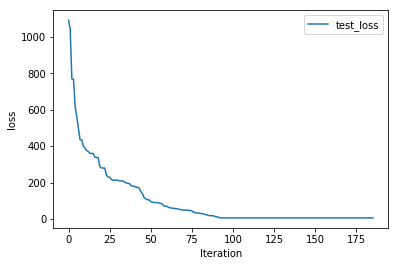

In [16]:
# parameters use to train with 
params = {
    "train_file": "./ml-100k/u2.base",
    "test_file": "./ml-100k/u2.test",
    "k": 150,
    "beta": 1,
    "user_number": 943,
    "item_number": 1682,
    "learning_rate": 0.0001,
    "epoch": 2
}
main(**params)

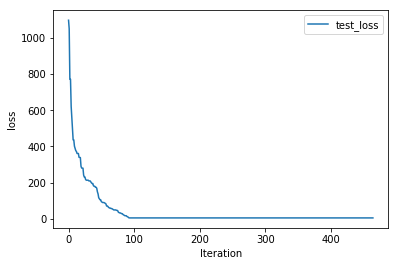

In [18]:
def main(train_file, test_file, k, beta, user_number, item_number, learning_rate=0.01, epoch=10):
    R_train = load_data(train_file,user_number,item_number)
    R_test = load_data(test_file,user_number,item_number)

    model = Recommendation(user_number,item_number,k)
    # test_loss = model.train(R_train, R_test, beta=beta, k=k,epoch=epoch) # train use ALS
    test_loss = model.train_SGD(R_train, R_test, beta=beta, learning_rate=learning_rate, epoch=epoch)  # train with SGD optimizer
    plot(test_loss)
    
    
# parameters use to train
params = {
    "train_file": "./ml-100k/u2.base",
    "test_file": "./ml-100k/u2.test",
    "k": 150,
    "beta": 1,
    "user_number": 943,
    "item_number": 1682,
    "learning_rate": 0.0001,
    "epoch": 5
}
main(**params)